# **Flight Delay Prediction**

**Note**:
After trying some modelling methods, I got this method is the best one. Therefore, I just collect this method as final project.

**Background:**
One form of transportation that is in great demand by people is air transportation because it is considered effective and efficient in terms of time. But this makes the flow of air transportation getting denser. The density of air transport causes flight delays. Flight delays cause losses to both the airline and the passengers.

**Objective:**
To predict whether the flight will be delayed or not.


# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from category_encoders.target_encoder import TargetEncoder

# **Load Data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dibimbing.id/FINAL PROJECT/Airlines.csv")
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


Data Dictionaries:
- id = Serial No
- Airline = Different types of commercial airlines
- Flight = Types of Aircraft
- AirportFrom = Source Airport
- AirportTo = Destination Airport
- DayOfWeek = Day of Departure (1 = Monday, 2 = Tuesday, 3 = Wednesday, etc.)
- Time = Time taken (in minute)
- Length = Distance of flight
- Delay (target variable) = (1;delay, 0;no)

Airlines:
- Alaska Airlines AS / ASA
- American Airlines AA/AAL
- Air Canada AC/ACA
- Aeromexico AM / AMX
- Continental Airlines CO / COA
- Delta Airlines DL / DAL
- FedEx FX / FDX
- Hawaiian Airlines HA / HAL
- Northwest Airlines NW / NWA
- Polar Air Cargo PO / PAC
- Southwest Airlines SW / SWA
- United Airlines UA / UAL
- United Parcel (UPS) 5X / UPS
- Virgin Atlantic VS / VIR
- VivaAerobús VB / VIV
- WestJet WS / WJ

Airport:
- ATL - Hartsfield-Jackson Atlanta International Airport - Georgia
- AUS - Austin-Bergstrom International Airport - Texas
- BNA - Nashville International Airport - Tennessee
- BOS - Boston Logan International Airport - Massachusetts
- BWI - Baltimore-Washington International Thurgood Marshall Airport - Washington
- CLT - Charlotte Douglas International Airport - North Carolina
- DAL - Dallas Love Field - Texas
- DCA - Ronald Reagan Washington National Airport - Arlington, Virginia
- DEN - Denver International Airport - Colorado
- DFW - Dallas/Fort Worth International Airport - Texas
- DTW - Detroit Metropolitan Airport - Michigan
- EWR - Newark Liberty International Airport - New Jersey
- FLL - Fort Lauderdale–Hollywood International Airport - Florida
- HNL - Daniel K. Inouye International Airport - Honolulu, Hawaii
- HOU - William P. Hobby Airport - Houston, Texas
-IAD - Dulles International Airport - Virginia
- IAH - George Bush Intercontinental Airport - Houston, Texas
- JFK - John F. Kennedy International Airport - Queens, New York
- LAS - McCarran International Airport - Las Vegas, Nevada
- LAX - Los Angeles International Airport - California
- LGA - LaGuardia Airport - Queens, New York
- MCO - Orlando International Airport - Florida
- MDW - Chicago Midway International Airport - Illinois
- MIA - Miami International Airport - Florida
- MSP - Minneapolis–Saint Paul International Airport - Minnesota
- MSY - Louis Armstrong New Orleans International Airport - Louisiana
- OAK - Oakland International Airport - California
- ORD - O'Hare International Airport - Chicago, Illinois
- PDX - Portland International Airport - Oregon
- PHL - Philadelphia International Airport - Pennsylvania
- PHX - Phoenix Sky Harbor International Airport - Arizona
- RDU - Raleigh-Durham International Airport - North Carolina
- SAN - San Diego International Airport - California
- SEA - Seattle–Tacoma International Airport - Washington
- SFO - San Francisco International Airport - California
- SJC - Norman Y. Mineta San Jose International Airport - California
- SLC - Salt Lake City International Airport - Utah
- SMF - Sacramento International Airport - California
- STL - St. Louis Lambert International Airport - Missouri
- TPA - Tampa International Airport - Florida

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


- 539383 rows
- 9 columns
- All data type is OK

##Check Missing Values

In [ ]:
df.isna().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

## Check Duplicated Data

In [ ]:
duplicated_rows = df[df.duplicated()]
print("number of duplicate rows =",duplicated_rows.shape )

number of duplicate rows = (0, 9)


There are no missing value and duplicated data.

# **EDA Part I**

In [ ]:
#separate numerical and categorical variables
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']

## Statistical Summary

In [ ]:
#statistic summary for numerical variables
df[num_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
id,539383.0,269692.000000,155706.604461,1.0,134846.5,269692.0,404537.5,539383.0
Flight,539383.0,2427.928630,2067.429837,1.0,712.0,1809.0,3745.0,7814.0
DayOfWeek,539383.0,3.929668,1.914664,1.0,2.0,4.0,5.0,7.0
Time,539383.0,802.728963,278.045911,10.0,565.0,795.0,1035.0,1439.0
Length,539383.0,132.202007,70.117016,0.0,81.0,115.0,162.0,655.0
Delay,539383.0,0.445442,0.497015,0.0,0.0,0.0,1.0,1.0



Based on the table above:
1. Min and max value are reasonable.
2. For skweness of each variable, we will see on univariate analysis

In [ ]:
#statistic summary for categorical variables
df[cat_vars].describe().T

,count,unique,top,freq
Airline,539383,18,WN,94097
AirportFrom,539383,293,ATL,34449
AirportTo,539383,293,ATL,34440


Based on the table:
1. There are 18 Airlines, WN is Airline that most is used.
2. Most of departure airport in ATL.
3. And also destination airport in ATL.

## Univariate Analysis

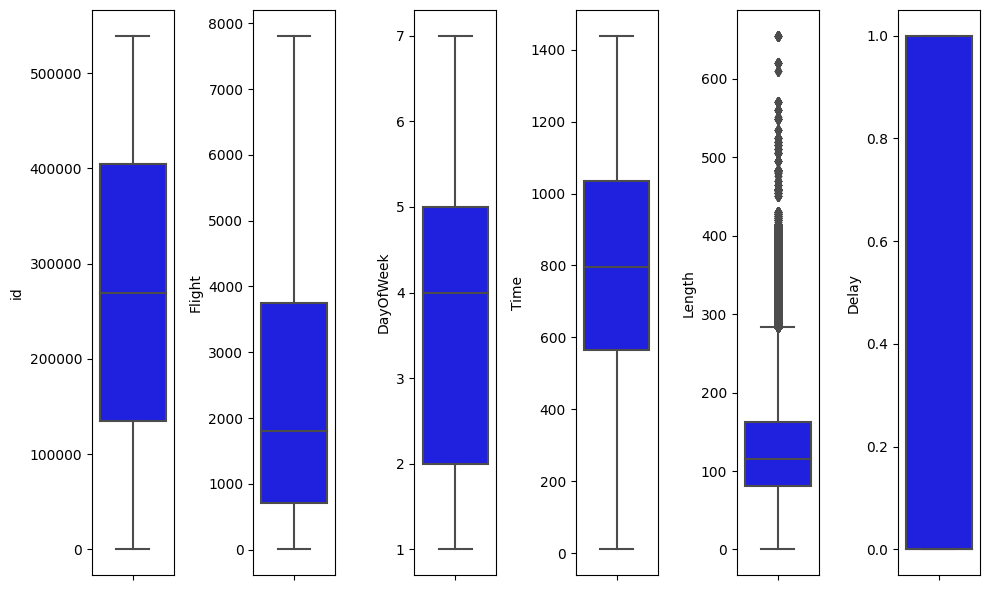

In [ ]:
#check Outlier
# plotting
plt.figure(figsize=(10,6))

features = num_vars
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue')
    plt.tight_layout()


There is an outlier in "Length' column, we will handle it later.

<ipython-input-18-e2f8cd44f398>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_vars[i]], ax = ax[i], axlabel=num_vars[i])
<ipython-input-18-e2f8cd44f398>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_vars[i]], ax = ax[i], axlabel=num_vars[i])
<ipython-input-18-e2f8cd44f398>:7:

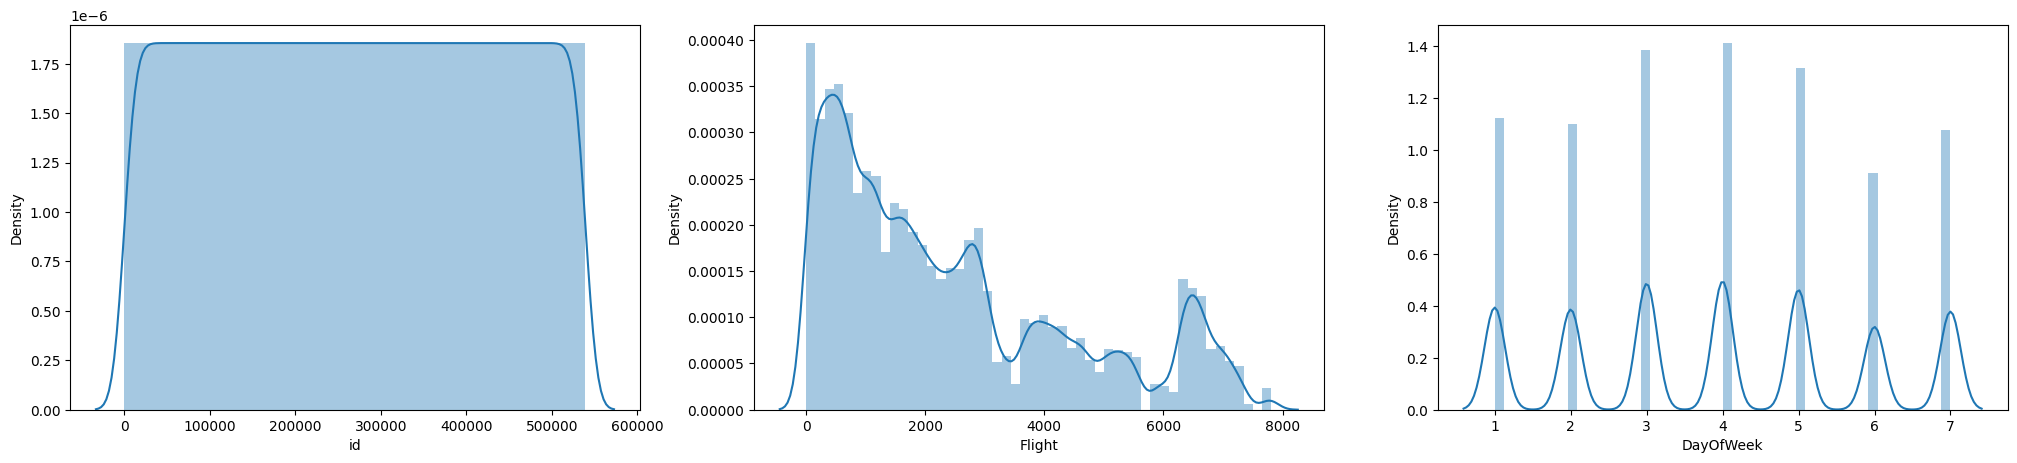

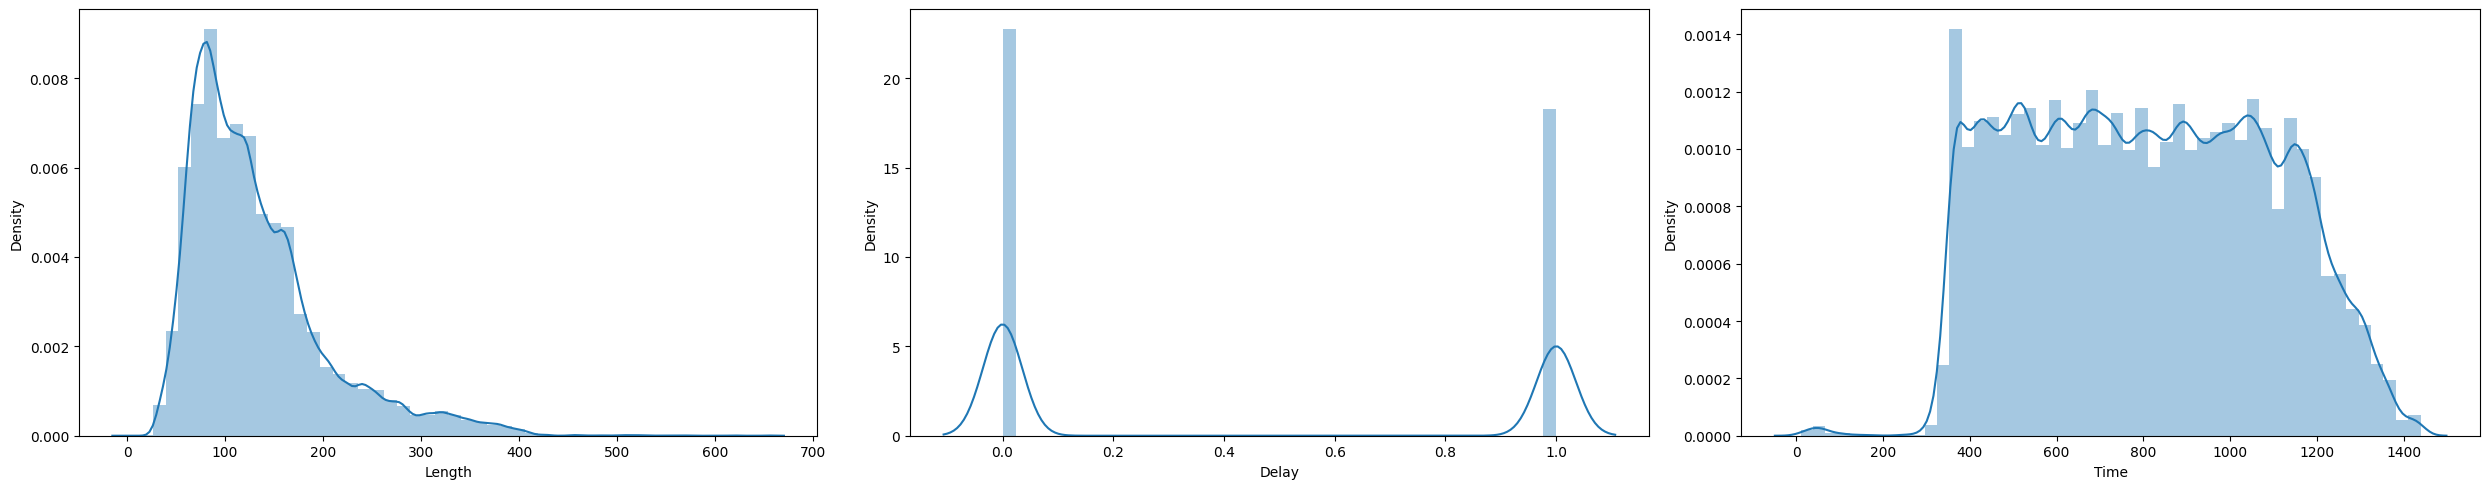

In [ ]:
#Check Distribution Skeweness
fig, ax = plt.subplots(1,len(num_vars)//2, figsize = (25,5))
fig2, ax2 = plt.subplots(1,len(num_vars)//2, figsize = (25,5))

for i in range(0, len(num_vars)):
  if i <= len(num_vars)//2-1:
    sns.distplot(df[num_vars[i]], ax = ax[i], axlabel=num_vars[i])
  else:
    sns.distplot(df[num_vars[i]], ax = ax2[i-len(num_vars)//2-1], axlabel=num_vars[i])
  plt.tight_layout()

plt.show()


- column 'length' has positive skew.
- column 'Delay' almost balance.

### **Check percentage of target variable**

In [ ]:
percentage=df['Delay'].value_counts(normalize=True)*100
percentage

0    55.455771
1    44.544229
Name: Delay, dtype: float64

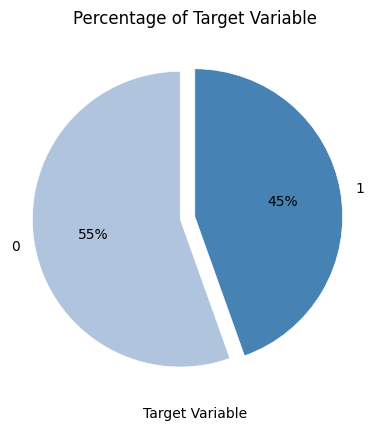

In [ ]:
#Create a pie chart
color = ['lightsteelblue', 'steelblue']
plt.pie(percentage.values, labels=percentage.index, startangle = 90, autopct='%1.0f%%', explode=(0.1,0), colors = color, wedgeprops = { 'linewidth' : 0.5, 'edgecolor' : 'white'} )

plt.title("Percentage of Target Variable")
plt.xlabel("Target Variable")
plt.show()

<Axes: xlabel='Airline', ylabel='count'>

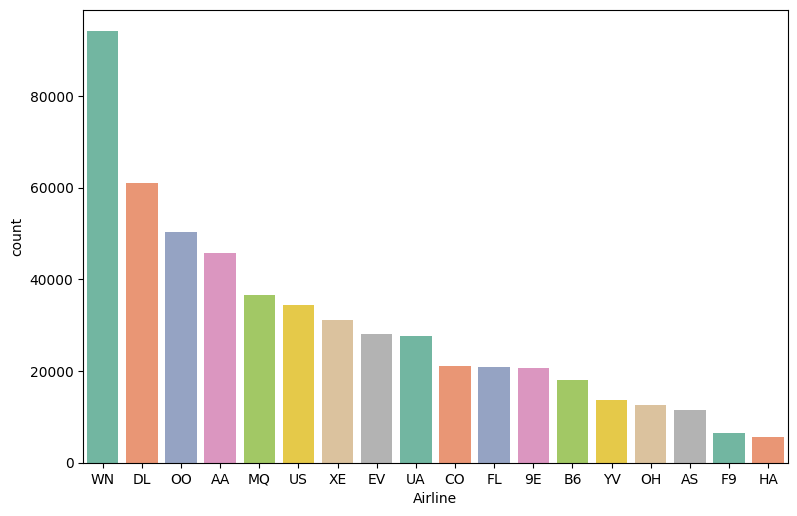

In [ ]:
#Check distribution of Airline
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'Airline', palette='Set2', data = df, order = df['Airline'].value_counts().index)

The most operating airline is WN and the least operating is HA

In [ ]:
#Showing the distribution of the top 20 destination airports
dt_AirportTo = df[['AirportTo','id']].groupby('AirportTo').agg('count').reset_index()
dt_AirportTo = dt_AirportTo.sort_values('id', ascending=False)
fig = px.bar(dt_AirportTo.head(20), x='AirportTo', y='id', )
fig.show()

In [ ]:
#Showing the distribution of the top 20 departure airports
dt_AirportFrom = df[['AirportFrom','id']].groupby('AirportFrom').agg('count').reset_index()
dt_AirportFrom = dt_AirportFrom.sort_values('id', ascending=False)
fig = px.bar(dt_AirportFrom.head(20), x='AirportFrom', y='id', )
fig.show()

## Bivariate Analysis

## Question 1:
## Which airline has the most delays?

<Axes: xlabel='Airline', ylabel='count'>

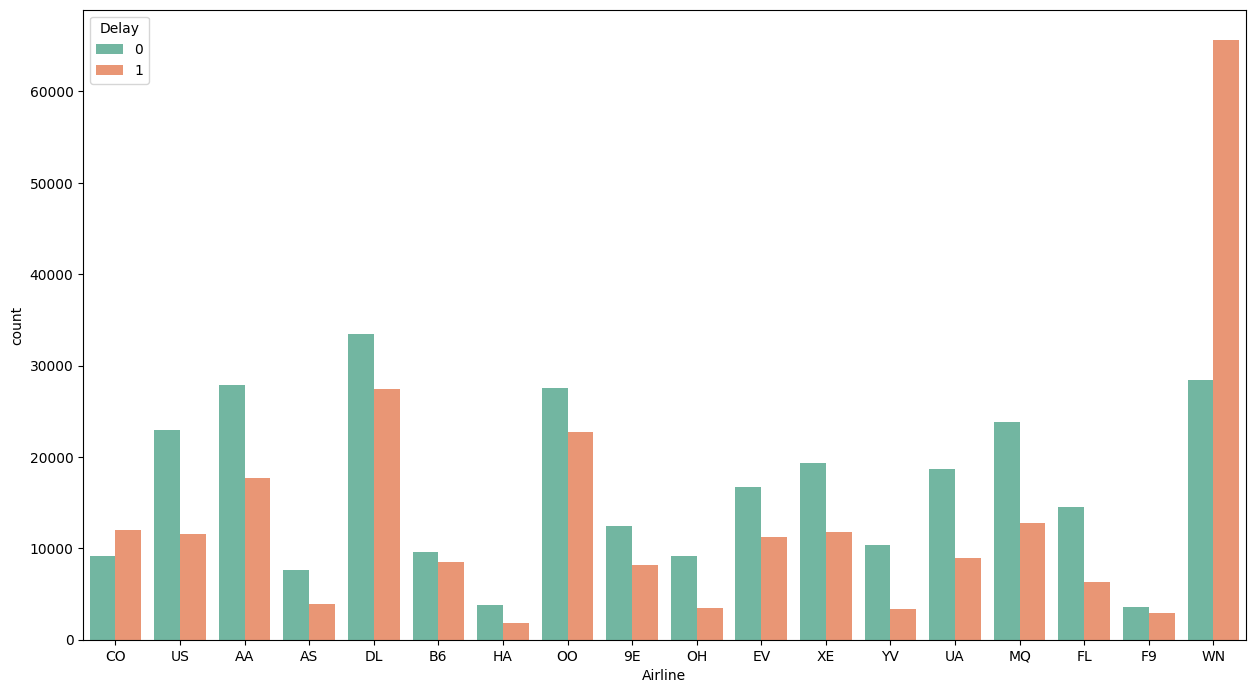

In [ ]:
plt.figure(figsize = (15,18))

plt.subplot(2,1,1)
sns.countplot(x = 'Airline', hue= 'Delay', palette='Set2', data = df)



Based on graph above, it can be known that airline 'WN' has a lot delay flight among other Airlines.

## Question 2:
## What days are there a lot of flight delays?

<Axes: xlabel='DayOfWeek', ylabel='count'>

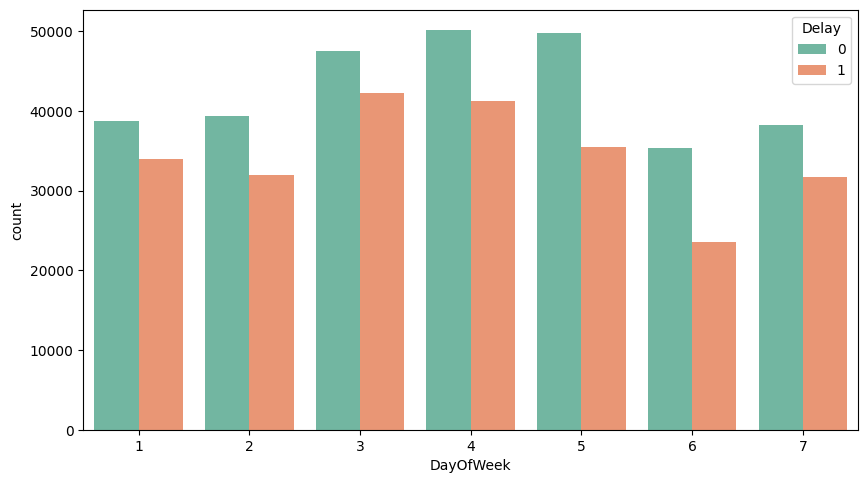

In [ ]:
plt.figure(figsize = (10,12))
plt.subplot(2,1,2)
sns.countplot(x = 'DayOfWeek', hue= 'Delay', palette='Set2', data = df)

Based on barchart above, it can be seen that on Wednesday (3) and Thursday (4) occcur many delay flight.

## Question 3
## Which departure airport has the most flight delays?

In [ ]:
dt_df = df[['AirportFrom','Delay']].groupby('AirportFrom').agg('count').reset_index()
fig = px.bar(dt_df, x='AirportFrom', y='Delay',template = 'plotly_dark')
fig.show()

Based on graph above, it can be seen that departure airport  'ATL' has a lot flight delay among other airports.


## Question 4:
## Which destination airport has the most flight delays?

In [ ]:
dt_df = df[['AirportTo','Delay']].groupby('AirportTo').agg('count').reset_index()
fig = px.bar(dt_df, x='AirportTo', y='Delay',template = 'plotly_dark')
fig.show()

Based on graph above, it can be seen that destination airport also 'ATL'  airport has a lot flight delay among other airports.


# Statistic Test Part 1

### Statistic Test for 'Day of Week'

1. Is the delay significantly affected by day of week?

In [ ]:
from scipy.stats import chi2_contingency

# Create a DataFrame with the predictor and target variables
data_uji = pd.DataFrame({'DayOfWeek': df['DayOfWeek'],
                     'Target': df['Delay']})

# Create a contingency table of observed frequencies
contingency_table = pd.crosstab(data_uji['DayOfWeek'], data_uji['Target'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

if p_value < 0.05:
  print('Therefore, DayOfWeek significantly affects Delay')
else:
  print('No Affect')

Chi-square statistic: 1178.1207446422302
p-value: 2.6007280556741412e-251
Therefore, DayOfWeek significantly affects Delay


p-value < 0.05, so it can be conclude that 'DayOfWeek' affects the Delay of flight.

## Check Correlation heatmap

<ipython-input-27-0246a6b9c669>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

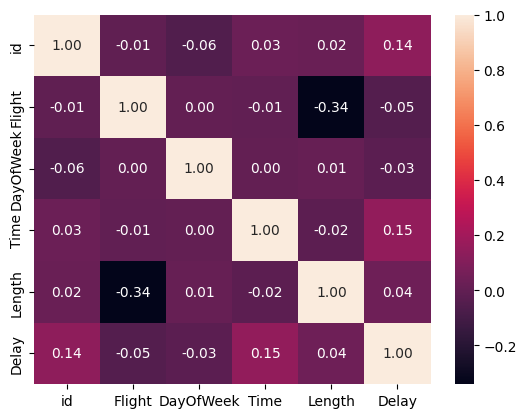

In [ ]:
#correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

There are no predictor variables that are highly correlated with each other, nor are there predictor variables that are highly correlated with the target variable.

# **Data Pre-Processing Part I**

## **Handling Outlier**

In [ ]:
#making new dataframe using df.copy()
data = df.copy()
data

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


Split data before handling outlier and just handling outlier on 'train' data. The purpose split data before handling outlier is to avoid data leakage.

In [ ]:
train, test = train_test_split(data, test_size=0.2)
outlier = train.copy()
outlier.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
426475,426476,AA,835,IND,DFW,6,900,145,1
317992,317993,AA,1499,TPA,DFW,7,715,175,0
513893,513894,OO,6288,MRY,LAX,4,756,68,0
371136,371137,US,1675,EWR,CLT,3,620,116,0
309764,309765,9E,4081,MEM,BHM,6,1180,63,0


Handling Outlier Using IQR

In [ ]:
print(f'Rows before filtering outliers : {len(outlier)}')

filtered_entries = np.array([True] * len(outlier))

#IQR Process
for col in ['Length']:
    Q1 = outlier[col].quantile(0.25)
    Q3 = outlier[col].quantile(0.75)
    IQR = Q3 - Q1 #rumus IQR
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((outlier[col] >= low_limit) & (outlier[col] <= high_limit)) & filtered_entries

df_handling_outlier = outlier[filtered_entries]

print(f'Rows after filtering outliers : {len(df_handling_outlier)}')

Rows before filtering outliers : 431506
Rows after filtering outliers : 410946


In [ ]:
df_handling_outlier

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
426475,426476,AA,835,IND,DFW,6,900,145,1
317992,317993,AA,1499,TPA,DFW,7,715,175,0
513893,513894,OO,6288,MRY,LAX,4,756,68,0
371136,371137,US,1675,EWR,CLT,3,620,116,0
309764,309765,9E,4081,MEM,BHM,6,1180,63,0
...,...,...,...,...,...,...,...,...,...
533552,533553,XE,2767,ALB,CLE,5,855,97,0
385315,385316,FL,912,MKE,BWI,4,400,120,0
437204,437205,US,1015,IAH,CLT,7,615,142,1
222896,222897,WN,787,SJC,PHX,1,1270,105,0


### **Note:**

data frame 'df_handling_outlier' is **data train** after doing outlier handling.

# **Adding New Column**

In [ ]:
#adding 'velocity' column
df_handling_outlier['Velocity'] = df_handling_outlier['Length']/df_handling_outlier['Time']
test['Velocity'] = test['Length']/test['Time']

<ipython-input-32-65d3486193bd>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Because our data has divided into train and test, so we need to add 'velocity' to both of dataframe(train and test).

# **EDA Part II**

## Statistic Test Part 2
2. Is the delay significantly affected by time, length, and velocity?

In [ ]:
predictor_data = df_handling_outlier[['Time','Velocity','Length']]
predictor_data.head()

,Time,Velocity,Length
426475,900,0.161111,145
317992,715,0.244755,175
513893,756,0.089947,68
371136,620,0.187097,116
309764,1180,0.053390,63


In [ ]:
target_data = df_handling_outlier[['Delay']]
import statsmodels.api as sm

# Assuming 'predictor_data' is a Pandas Series or DataFrame containing your continuous predictor variable
# Assuming 'target_data' is a Pandas Series or DataFrame containing your categorical target variable

# Add a constant column to the predictor data
predictor_data = sm.add_constant(predictor_data)

# Fit the logistic regression model
logit_model = sm.Logit(target_data, predictor_data)
logit_result = logit_model.fit()

# Print the summary of the logistic regression model
print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.673341
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  Delay   No. Observations:               410946
Model:                          Logit   Df Residuals:                   410942
Method:                           MLE   Df Model:                            3
Date:                Sat, 03 Jun 2023   Pseudo R-squ.:                 0.01979
Time:                        03:04:04   Log-Likelihood:            -2.7671e+05
converged:                       True   LL-Null:                   -2.8229e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4329      0.013   -109.902      0.000      -1.458      -1.407
Time           0.0012   1.23e

Value of P>|z| is small, therefore **time, velocity**, and **length** **affected the delay.**

# **Data Pre-processing Part II**

## **Mean Encoding**

In [ ]:
#making new data frame using df_handling_outlier.copy()
train = df_handling_outlier.copy()
train

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Velocity
426475,426476,AA,835,IND,DFW,6,900,145,1,0.161111
317992,317993,AA,1499,TPA,DFW,7,715,175,0,0.244755
513893,513894,OO,6288,MRY,LAX,4,756,68,0,0.089947
371136,371137,US,1675,EWR,CLT,3,620,116,0,0.187097
309764,309765,9E,4081,MEM,BHM,6,1180,63,0,0.053390
...,...,...,...,...,...,...,...,...,...,...
533552,533553,XE,2767,ALB,CLE,5,855,97,0,0.113450
385315,385316,FL,912,MKE,BWI,4,400,120,0,0.300000
437204,437205,US,1015,IAH,CLT,7,615,142,1,0.230894
222896,222897,WN,787,SJC,PHX,1,1270,105,0,0.082677


In [ ]:
test

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Velocity
163193,163194,UA,100,SFO,IAD,5,702,313,1,0.445869
153951,153952,B6,1247,BOS,CLT,4,1170,143,0,0.122222
91475,91476,CO,1615,MFE,IAH,1,656,69,0,0.105183
343487,343488,XE,2194,GSO,IAH,1,1085,177,0,0.163134
74368,74369,FL,1581,BKG,ATL,7,704,94,0,0.133523
...,...,...,...,...,...,...,...,...,...,...
382664,382665,WN,1726,LAX,PHX,3,1230,75,1,0.060976
160704,160705,WN,1425,LAS,CLE,5,575,245,1,0.426087
462394,462395,DL,2558,AUS,ATL,1,970,131,0,0.135052
479327,479328,B6,309,IAD,FLL,2,886,157,1,0.177201


In [ ]:
feature_list = list(train.columns)
feature_list

['id',
 'Airline',
 'Flight',
 'AirportFrom',
 'AirportTo',
 'DayOfWeek',
 'Time',
 'Length',
 'Delay',
 'Velocity']

In [ ]:
TE_encoder = TargetEncoder()
train_te = TE_encoder.fit_transform(train[feature_list], train['Delay'])
test_te = TE_encoder.transform(test[feature_list])

train_te

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Velocity
426475,426476,0.391298,835,0.397518,0.319749,6,900,145,1,0.161111
317992,317993,0.391298,1499,0.382241,0.319749,7,715,175,0,0.244755
513893,513894,0.455638,6288,0.305785,0.503254,4,756,68,0,0.089947
371136,371137,0.328667,1675,0.470790,0.319362,3,620,116,0,0.187097
309764,309765,0.393539,4081,0.317368,0.539683,6,1180,63,0,0.053390
...,...,...,...,...,...,...,...,...,...,...
533552,533553,0.378203,2767,0.413279,0.443645,5,855,97,0,0.113450
385315,385316,0.297050,912,0.451425,0.497987,4,400,120,0,0.300000
437204,437205,0.328667,1015,0.483426,0.319362,7,615,142,1,0.230894
222896,222897,0.696882,787,0.604391,0.448939,1,1270,105,0,0.082677


In [ ]:
test_te

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Velocity
163193,163194,0.309967,100,0.549128,0.352814,5,702,313,1,0.445869
153951,153952,0.459893,1247,0.382226,0.319362,4,1170,143,0,0.122222
91475,91476,0.553367,1615,0.228758,0.399600,1,656,69,0,0.105183
343487,343488,0.378203,2194,0.352857,0.399600,1,1085,177,0,0.163134
74368,74369,0.297050,1581,0.230639,0.382541,7,704,94,0,0.133523
...,...,...,...,...,...,...,...,...,...,...
382664,382665,0.696882,1726,0.511143,0.448939,3,1230,75,1,0.060976
160704,160705,0.696882,1425,0.565622,0.443645,5,575,245,1,0.426087
462394,462395,0.448459,2558,0.429160,0.382541,1,970,131,0,0.135052
479327,479328,0.459893,309,0.376433,0.549656,2,886,157,1,0.177201


### **Note:**

'train_te' and 'test_te' is dataframe after doing mean encoding

In [ ]:
train_te = train_te.reset_index(drop=True)
train_te

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Velocity
0,426476,0.391298,835,0.397518,0.319749,6,900,145,1,0.161111
1,317993,0.391298,1499,0.382241,0.319749,7,715,175,0,0.244755
2,513894,0.455638,6288,0.305785,0.503254,4,756,68,0,0.089947
3,371137,0.328667,1675,0.470790,0.319362,3,620,116,0,0.187097
4,309765,0.393539,4081,0.317368,0.539683,6,1180,63,0,0.053390
...,...,...,...,...,...,...,...,...,...,...
410941,533553,0.378203,2767,0.413279,0.443645,5,855,97,0,0.113450
410942,385316,0.297050,912,0.451425,0.497987,4,400,120,0,0.300000
410943,437205,0.328667,1015,0.483426,0.319362,7,615,142,1,0.230894
410944,222897,0.696882,787,0.604391,0.448939,1,1270,105,0,0.082677


In [ ]:
test_te = test_te.reset_index(drop=True)
test_te

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Velocity
0,163194,0.309967,100,0.549128,0.352814,5,702,313,1,0.445869
1,153952,0.459893,1247,0.382226,0.319362,4,1170,143,0,0.122222
2,91476,0.553367,1615,0.228758,0.399600,1,656,69,0,0.105183
3,343488,0.378203,2194,0.352857,0.399600,1,1085,177,0,0.163134
4,74369,0.297050,1581,0.230639,0.382541,7,704,94,0,0.133523
...,...,...,...,...,...,...,...,...,...,...
107872,382665,0.696882,1726,0.511143,0.448939,3,1230,75,1,0.060976
107873,160705,0.696882,1425,0.565622,0.443645,5,575,245,1,0.426087
107874,462395,0.448459,2558,0.429160,0.382541,1,970,131,0,0.135052
107875,479328,0.459893,309,0.376433,0.549656,2,886,157,1,0.177201


Doing reset_index(drop=True) for tyding the index of dataframes.

In [ ]:
#drop column 'id' on train_te and test_te data
train_te = train_te.drop('id', axis=1)
test_te = test_te.drop('id', axis=1)

In [ ]:
train_te

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Velocity
0,0.391298,835,0.397518,0.319749,6,900,145,1,0.161111
1,0.391298,1499,0.382241,0.319749,7,715,175,0,0.244755
2,0.455638,6288,0.305785,0.503254,4,756,68,0,0.089947
3,0.328667,1675,0.470790,0.319362,3,620,116,0,0.187097
4,0.393539,4081,0.317368,0.539683,6,1180,63,0,0.053390
...,...,...,...,...,...,...,...,...,...
410941,0.378203,2767,0.413279,0.443645,5,855,97,0,0.113450
410942,0.297050,912,0.451425,0.497987,4,400,120,0,0.300000
410943,0.328667,1015,0.483426,0.319362,7,615,142,1,0.230894
410944,0.696882,787,0.604391,0.448939,1,1270,105,0,0.082677


In [ ]:
test_te

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Velocity
0,0.309967,100,0.549128,0.352814,5,702,313,1,0.445869
1,0.459893,1247,0.382226,0.319362,4,1170,143,0,0.122222
2,0.553367,1615,0.228758,0.399600,1,656,69,0,0.105183
3,0.378203,2194,0.352857,0.399600,1,1085,177,0,0.163134
4,0.297050,1581,0.230639,0.382541,7,704,94,0,0.133523
...,...,...,...,...,...,...,...,...,...
107872,0.696882,1726,0.511143,0.448939,3,1230,75,1,0.060976
107873,0.696882,1425,0.565622,0.443645,5,575,245,1,0.426087
107874,0.448459,2558,0.429160,0.382541,1,970,131,0,0.135052
107875,0.459893,309,0.376433,0.549656,2,886,157,1,0.177201


## **Handling Imbalance Data**

Handling imbalance data only for data train.

In [ ]:
train_te['Delay'].value_counts()

0    228352
1    182594
Name: Delay, dtype: int64

In [ ]:
from imblearn import over_sampling

X = train_te.drop(['Delay'], axis=1)
y = train_te['Delay']

X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

In [ ]:
X_train_bhome = X_over_smote.copy()
y_train_bhome = y_over_smote.copy()

In [ ]:
X_test_bhome = test_te.drop(['Delay'], axis=1)
y_test_bhome = test_te['Delay']

# **Modelling**
Because we have split the data above, we don't need to do it again.

***note***: bhome is "balance + handling outlier + mean encoding"

**KNN**

Fit(Training)

In [ ]:
knn_bhome =KNeighborsClassifier()
knn_bhome.fit(X_train_bhome, y_train_bhome)

KNeighborsClassifier()

Predict

In [ ]:
y_pred_knn_bhome = knn_bhome.predict(X_test_bhome)
y_pred_knn_bhome

array([1, 1, 0, ..., 0, 0, 0])

Evaluation

In [ ]:
print('accuracy score KNN BHOME', accuracy_score(y_test_bhome, y_pred_knn_bhome))
print('F1 score KNN BHOME', f1_score(y_test_bhome, y_pred_knn_bhome))
print('recall score KNN BHOME', recall_score(y_test_bhome, y_pred_knn_bhome))
print('precision score KNN BHOME', precision_score(y_test_bhome, y_pred_knn_bhome))

accuracy score KNN BHOME 0.630236287623868
F1 score KNN BHOME 0.5903316250552023
recall score KNN BHOME 0.5991244527829893
precision score KNN BHOME 0.5817931537075649


In [ ]:
y_pred_knn = pd.Series(y_pred_knn_bhome)
y_pred_knn.value_counts()

0    58478
1    49399
dtype: int64

In [ ]:
y_test_bhome.value_counts()

0    59907
1    47970
Name: Delay, dtype: int64

#**Dalex**

In [ ]:
!pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1046001 sha256=f297a160b85950e260270e5b2ab9327b6ce0ec3ded4697cd9870b39d245219ec
  Stored in directory: /root/.cache/pip/wheels/c8/45/19/f5810bf7c5ff9a476ebd89bb5b81a18ffcdf93931d17dbb0c1
Successfully built dalex


In [ ]:
# import dalex to explain complex model
import dalex as dx
## initiate explainer for the best model
var_exp = dx.Explainer(knn_bhome,X_train_bhome, y_train_bhome, label = "KNN Interpretation")

Preparation of a new explainer is initiated

  -> data              : 456704 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 456704 values
  -> model_class       : sklearn.neighbors._classification.KNeighborsClassifier (default)
  -> label             : KNN Interpretation
  -> predict function  : <function yhat_proba_default at 0x7ff2748151b0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



  -> predicted values  : min = 0.0, mean = 0.497, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = 0.00287, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
# visualize permutation feature importance for the best model
var_exp.model_parts().plot()

In [ ]:
# create partial dependence plot of LogReg model
var_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 8/8 [00:01<00:00,  5.40it/s]


Based on graph above, it can known that day of week, time, and length are the most influential predictor variable on delay.


### **Note:**

Although, 'flight' column in first position in variable importance, but actually, it does not affected on delay. Because 'flight' column on this dataset is just type of aircrafts.

#**Business Case**

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

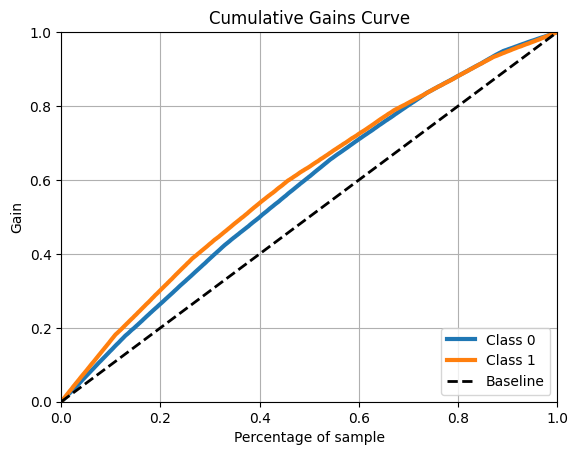

In [ ]:
# load scikitplot untuk visualisasi metrik

import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test_bhome, knn_bhome.predict_proba(X_test_bhome))

Based on the Curve, it can be seen that there is an increase in company performance between using a model and without a model.

***Baseline in curve means without modelling***


## **Business Scenario**

Assume on this dataset just from 1 Airlines.

We will count profit and loss of the Airline when using modelling. And we will count based on confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix
def evaluate_model(y_actual, y_prediction):
    tn, fp, fn, tp = confusion_matrix(y_actual, y_prediction).ravel()
    print('TN :',tn)
    print('TP :',tp)
    print('FN :',fn)
    print('FP :',fp)

In [ ]:
#Confusion matrix
evaluate_model(y_test_bhome, y_pred_knn_bhome)

TN : 39392
TP : 28845
FN : 19231
FP : 20409


### **- Check profit based TP(True Positive) and TN(True Negative)**

**TP**

KNN:
- Population : 28845 --> total sample (20%) * 28845 = 5769
- Treat Population sampling : 20%
- Model : 35%
- Baseline (without model) : 20%
- cost: $3 --> (cost promotion)
- margin rate : 15%

    Assumption:
    One flight need cost = IDR100.000.000.

    So, IDR100.000.000 * margin rate(15%) = IDR15.000.000.

    And we assume again $1 = IDR15.000,

    then IDR15.000.000 = $1000 --> margin rate = $1000







**TN**

KNN:

- Population : 39392 --> total sample (20%) * 39392 = 7878
- Treat Population sampling : 20%
- Model : 33%
- Baseline (without model) : 20%
- cost: $3
- margin rate : 15%

    Assumption:
    One flight need cost = IDR100.000.000.

    So, IDR100.000.000 * margin rate(15%) = IDR15.000.000.

    And we assume again $1 = IDR15.000,

    then IDR15.000.000 = $1000 --> margin rate = $1000




**Note**: (*the percentage of Model and Random choice above is from previous Curve*)


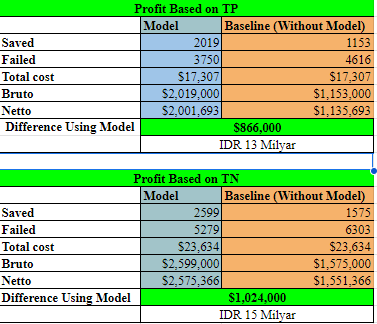

**Total Profit = IDR 13 Milyar + IDR 15 Milyar = IDR 28 Milyar**

### **- Check Loss based FP(False Positive) and FN(False Negative)**

**FP:**

- Population : 20409 --> total sample (20%) * 20409 = 4081
- Treat Population sampling : 20%
- Model : 35%
- Random Choice(without model) : 20%
- cost: $3
- margin rate : 15%

    Assumption:
    One flight need cost = IDR100.000.000.

    So, IDR100.000.000 * margin rate(15%) = IDR15.000.000.

    And we assume again $1 = IDR15.000,

    then IDR15.000.000 = $1000 --> margin rate = $1000


**FN:**
- Population : 19231 --> total sample (20%) * 19231 = 3846
- Treat Population sampling : 20%
- Model : 33%
- Random Choice(without model) : 20%
- cost: $3
- margin rate : 15%

    Assumption:
    One flight need cost = IDR100.000.000.

    So, IDR100.000.000 * margin rate(15%) = IDR15.000.000.

    And we assume again $1 = IDR15.000,

    then IDR15.000.000 = $1000 --> margin rate = $1000


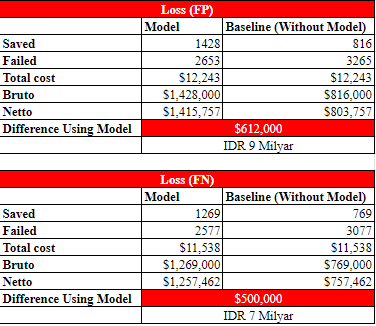

**Total Loss = IDR 9 Milyar + IDR 7 Milyar = IDR 16 Milyar**

Based on analyzing above, then

Netto Income = Total Profit-Total Loss

IDR 28 Milyar - IDR 16 Milyar
=IDR 12 Milyar


**Note:**
- Saved = Total Sample * Model/Baseline (Without Model)
- Failed = Total Sample - Saved
- Total Cost = Total Sample * Cost ($3)

- Bruto = Margin Rate ($1000) * Saved
- Netto = Bruto - Total Cost
- Difference Using Model = Netto Model - Netto Random Choice

# **Conclusion and Business Recommendation**

 **Conclusion**
- Among several modelling methods, ‘Balance data + handling outlier + mean encoding’ is the best one.
- The best kind of model is K-Nearest Neighbour (KNN).
- Some features that most influence to delay is day of week, time, and length of flight.
- After analyzing the business case, it can found that it can be seen that the total profit is greater than the total loss when using modelling.

**Business Recommendation:**
- Flight Planning and Scheduling: Airlines can utilize the insights from our model to optimize their flight planning and scheduling processes. By considering the impact of the day, duration, and length of the flight on delays, airlines can adjust their schedules to minimize the likelihood of delays. This can result in improved operational efficiency, better on-time performance, and increased customer satisfaction.
- Passenger Communication: Airlines can proactively communicate potential delays to passengers based on the predicted. By providing passengers with advance notice and managing their expectations, airlines can enhance the overall travel experience. Passengers can make informed decisions and adjust their plans accordingly, reducing frustration and improving customer satisfaction.
- Crew and Resource Allocation: Flight delay predictions can assist airlines in optimizing crew and resource allocation. By considering the impact of the day, duration, and length of the flight, airlines can allocate resources more effectively, ensuring that the necessary crew, ground staff, and facilities are available at the right time and place. This can minimize disruptions and improve operational efficiency.




## **Appendix**

To see other methods, please visit link drive below:

https://drive.google.com/drive/folders/1WlTh_z-1mGdDmDRjzJsm6eyKOdiN42Kr?usp=sharing